### Assignment-04

#### Part 1-2 Finish the Solution Parse for Edit Distance

In [102]:
from functools import lru_cache 

In [103]:
solution = {}

In [104]:
@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]

    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),
    ]

    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)
    # find the minimal edit distance among all possible operations
    min_distance, operation = min(candidates, key=lambda x: x[0])
    solution[(string1, string2)] = operation
        
    return min_distance
    

In [105]:
edit_distance('ABCD','ABCE')

1

In [106]:
solution

{('A', 'A'): '',
 ('A', 'AB'): 'ADD B',
 ('A', 'ABC'): 'ADD C',
 ('A', 'ABCE'): 'ADD E',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AB'): '',
 ('AB', 'ABC'): 'ADD C',
 ('AB', 'ABCE'): 'ADD E',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AB'): 'DEL C',
 ('ABC', 'ABC'): '',
 ('ABC', 'ABCE'): 'ADD E',
 ('ABCD', 'A'): 'DEL D',
 ('ABCD', 'AB'): 'DEL D',
 ('ABCD', 'ABC'): 'DEL D',
 ('ABCD', 'ABCE'): 'SUB D => E'}

In [ ]:
def parse_solution(target_length, edit_solution):
    """
    
    """
    pass

#### Part 3 Review Questions
+ Why do we need dynamic programming? What's the difference between dynamic programming and the previous search problem?

**Ans:** 

Dynamic Programming （DP） 是一类重要的搜索和优化问题，与前面所涉及的搜索问题（深度优先、广度优先）不同的是，DP 问题具有递归性，这种递归性又使得我们可以使用分析的方法来减小搜索空间、提高算法运行速度。
在 NLP 的语境下，DP 问题与 edit distance 和 word-embedding 问题相关。

+ Why do we still need dynamic programming? Why not train a machine learning to fit a function which could get the right answer based on inputs?


**Ans:** 

机器学习思路的局限有三个：a) 需要充足的训练数据量; b) 训练函数参量所花费的时间成本较高; c) 机器学习只能得到概率上的近似解而非精确解。相比之下，基于分析的 DP 思路得到的解决方案比训练函数和神经网络的速度快，而且可以得到精确解。

+ Provide at least 3 problems which could solved by Dynamic Programming.

**Ans:** 

课上讲到的例子有：瓷砖切割问题、外卖路线优化问题; 其他应用有生物信息学中的序列分析 (sequence alignment)。


+ Provide at least 3 problems wich could sloved by Edit Distance?

**Ans:** 

测量两个字符串或语言文本之间的相似度；拼写纠错的优化；用来衡量和评价机器翻译的精确度。

+ Please summarize the three main features of Dynamic Programming, and make a concise explanation for each feature.

**Ans:** 

    * 分析子问题的重复性 (recursive -- 递归)；
    * 把子问题存储起来 (比如用python里的decorator实现)
    * 构建和解析solution



+ What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

**Ans:** 

DP 算法的局限性主要有：a) 所要解决的子问题之间必须具有重复性 (overlapping) 且解决方式呈递归性（recursive）; b) 全局最优解必须是子问题局部最优解的相关函数（否则可能会出现所有子问题的局部最优解的集合并非全局最优）。

Reference: https://en.wikipedia.org/wiki/Dynamic_programming

#### (Optional) The k-person-salesman problem

In [62]:
import random
import matplotlib.pylab as plt

In [63]:
latitude = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

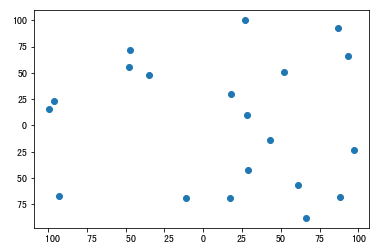

In [64]:
plt.scatter(latitude, longitude)

给定一个初始点 $P$, 已知$k$个车辆，如何从该点出发，使这$k$个车辆经过所有的点全部一次，而且所走过的路程最短?

In [65]:
chosen_p = (5, 10)


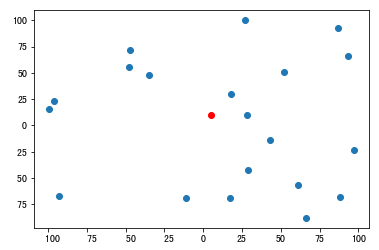

In [66]:
plt.scatter(latitude, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')

1) we start with the simplest case: k = 1. The recursive function is to look for the nearest point as the next step, and the exit condition is when the car has travelled through all points.

In [67]:
from scipy.spatial import distance

In [68]:
distances = []
for i in range(len(latitude)):
    current_dist = distance.euclidean(chosen_p, (latitude[i], longitude[i]))
    distances.append(current_dist)

In [69]:
distances

[62.369864518050704,
 97.73944955850733,
 124.63145670335399,
 104.30723848324239,
 87.32124598286491,
 23.853720883753127,
 115.43396380615195,
 101.83319694480774,
 44.94441010848846,
 80.60397012554654,
 23.0,
 113.89907813498755,
 55.17245689653489,
 57.271284253105414,
 104.17293314484334,
 70.178344238091,
 92.64987857520376,
 116.67476162392619,
 79.90619500389191,
 80.91971329657564]

In [70]:
distances.index(min(distances)) # find the index for the nearest point

10

In [61]:
def get_nearest_p(p1, xlist, ylist):
    """
    Define a function that finds the nearest point to p1, 
    among a given list of x-coords and y-coords
    and returns the index of the target point and the distance
    
    @p1 = (x, y)
    @xlist = a list of x-coords
    @ylist = a list of y-coords
    """
    
    distances = []
    
    if len(xlist) == len(ylist):
        for i in range(len(xlist)):
            current_p = (xlist[i], ylist[i])
            distances.append(distance.euclidean(p1, current_p))
        
    return distances.index(min(distances)), min(distances)

    #else: return -1, None   # return None if the input formats are wrong
    

In [71]:
path = []

while latitude:
    next_p, dist = get_nearest_p(chosen_p, latitude, longitude)
    chosen_p = (latitude[next_p], longitude[next_p])
    path.append((latitude.pop(next_p), longitude.pop(next_p), dist))
    

In [73]:
path  # (x, y, travel distance)

[(28, 10, 23.0),
 (18, 30, 22.360679774997898),
 (52, 51, 39.96248240537617),
 (93, 66, 43.657759905886145),
 (87, 93, 27.65863337187866),
 (27, 100, 60.40695324215582),
 (-47, 72, 79.12016177940993),
 (-48, 56, 16.0312195418814),
 (-35, 48, 15.264337522473747),
 (-96, 23, 65.92419889539804),
 (-99, 16, 7.615773105863909),
 (-93, -67, 83.21658488546619),
 (-11, -69, 82.02438661763951),
 (17, -69, 28.0),
 (29, -42, 29.546573405388315),
 (43, -14, 31.304951684997057),
 (61, -57, 46.61544808322666),
 (88, -68, 29.154759474226502),
 (66, -88, 29.732137494637012),
 (97, -23, 72.01388754955533)]

2) when $k > 1$, for each car, we always look for the nearest point as the next step (local optimal solution), so that the path for each car is the shortest. Therefore, the key to solving this problem is to select $k$ out of the total $n$ points as the first steps so that the sum of all $k$ pathes are the shortest. In other words, the size of the search space is basically $n$ choose $k$ = $\frac{n!}{k!(n-k)!}$

In [96]:
from itertools import combinations 

def rSubset(arr, r): 
    # return list of all subsets of length r 
    # to deal with duplicate subsets use  
    # set(list(combinations(arr, r))) 
    return list(combinations(arr, r)) 

# https://docs.python.org/3/library/itertools.html#itertools.combinations

In [90]:
latitude = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

In [94]:
list(range(len(latitude)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [98]:
# suppose k = 4

rSubset(list(range(len(latitude))), 4)

[(0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 2, 5),
 (0, 1, 2, 6),
 (0, 1, 2, 7),
 (0, 1, 2, 8),
 (0, 1, 2, 9),
 (0, 1, 2, 10),
 (0, 1, 2, 11),
 (0, 1, 2, 12),
 (0, 1, 2, 13),
 (0, 1, 2, 14),
 (0, 1, 2, 15),
 (0, 1, 2, 16),
 (0, 1, 2, 17),
 (0, 1, 2, 18),
 (0, 1, 2, 19),
 (0, 1, 3, 4),
 (0, 1, 3, 5),
 (0, 1, 3, 6),
 (0, 1, 3, 7),
 (0, 1, 3, 8),
 (0, 1, 3, 9),
 (0, 1, 3, 10),
 (0, 1, 3, 11),
 (0, 1, 3, 12),
 (0, 1, 3, 13),
 (0, 1, 3, 14),
 (0, 1, 3, 15),
 (0, 1, 3, 16),
 (0, 1, 3, 17),
 (0, 1, 3, 18),
 (0, 1, 3, 19),
 (0, 1, 4, 5),
 (0, 1, 4, 6),
 (0, 1, 4, 7),
 (0, 1, 4, 8),
 (0, 1, 4, 9),
 (0, 1, 4, 10),
 (0, 1, 4, 11),
 (0, 1, 4, 12),
 (0, 1, 4, 13),
 (0, 1, 4, 14),
 (0, 1, 4, 15),
 (0, 1, 4, 16),
 (0, 1, 4, 17),
 (0, 1, 4, 18),
 (0, 1, 4, 19),
 (0, 1, 5, 6),
 (0, 1, 5, 7),
 (0, 1, 5, 8),
 (0, 1, 5, 9),
 (0, 1, 5, 10),
 (0, 1, 5, 11),
 (0, 1, 5, 12),
 (0, 1, 5, 13),
 (0, 1, 5, 14),
 (0, 1, 5, 15),
 (0, 1, 5, 16),
 (0, 1, 5, 17),
 (0, 1, 5, 18),
 (0, 1, 5, 19),
 (0, 1, 6, 7),
 (0, 1, 6, 8),
